# Optimization via Gradient Descent


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true = None):
    x = np.zeros((kmax + 1, x0.shape[0]))
    f_val = np.zeros((kmax + 1,))
    grads = np.zeros((kmax + 1, x0.shape[0]))
    err = np.zeros((kmax + 1,))
    err_true = np.zeros((kmax + 1,))
    
    x[0] = x0
    f_val[0] = f(x0)
    grads[0] = grad_f(x0)
    err[0] = np.linalg.norm(grads[0])
    if not x_true is None:
        err_true[0] = np.linalg.norm(x[0] - x_true)
    k = 1
    
    while(True):
        x[k] = x[k-1] - alpha*grads[k-1]
        f_val[k] = f(x[k])
        grads[k] = grad_f(x[k])
        err[k] = np.linalg.norm(grads[k])
        if not x_true is None:
            err_true[k] = np.linalg.norm(x[k] - x_true)
        
        # check stopping condition
        if k==kmax:
            print(f"Computation Timeout: exceeded {kmax} iterations \twith solution $x_m=$ {x[k]}, \u03B1={alpha}")
            break
        elif np.linalg.norm(grads[k]) <= tolf * np.linalg.norm(grads[k-1]):
            print(f"||\U00002207f(x_k)|| >= tolf * ||\U00002207f(x0)|| after {k} iterations \twith solution $x_m=$ {x[k]}, \u03B1={alpha}")
            break
        elif np.linalg.norm(x[k]- x[k-1]) <= tolx:
            print(f"||x[k]- x[k-1]|| <= tolx after {k} iterations\twith solution $x_m=$ {x[k]}, \u03B1={alpha}")    
            break
        k +=1
    
    x = x[:k+1]
    f_val = f_val[:k+1]
    grads = grads[:k+1]
    err = err[:k+1]
    err_true = err_true[:k+1]
    
    x_star = x[k, np.newaxis].repeat(k+1, axis=0)
    err_star = np.linalg.norm(x-x_star, axis=1)
    
    return x, k, f_val, grads, err, err_true, err_star

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def GD_b(f, grad_f, x0, kmax, tolf, tolx, x_true= None):
    x = np.zeros((kmax + 1, x0.shape[0]))
    f_val = np.zeros((kmax + 1,))
    grads = np.zeros((kmax + 1, x0.shape[0]))
    err = np.zeros((kmax + 1,))
    err_true = np.zeros((kmax + 1,))
    
    x[0] = x0
    f_val[0] = f(x0)
    grads[0] = grad_f(x0)
    err[0] = np.linalg.norm(grads[0])
    if not x_true is None:
        err_true[0] = np.linalg.norm(x[0] - x_true)
    k = 1
    
    while(True):
        alpha = backtracking(f, grad_f, x[k-1])
        x[k] = x[k-1] - alpha*grads[k-1]
        f_val[k] = f(x[k])
        grads[k] = grad_f(x[k])
        err[k] = np.linalg.norm(grads[k])
        if not x_true is None:
            err_true[k] = np.linalg.norm(x[k] - x_true)
        
        if k==kmax:
            print(f"Computation Timeout: exceeded {kmax} iterations\twith solution $x_m=$ {x[k]}, \u03B1=BT")
            break
        elif np.linalg.norm(grads[k]) <= tolf * np.linalg.norm(grads[k-1]):
            print(f"||\U00002207f(x_k)|| >= tolf * ||\U00002207f(x0)|| after {k} iterations\twith solution $x_m=$ {x[k]}, \u03B1=BT")
            break
        elif np.linalg.norm(x[k]- x[k-1]) <= tolx:
            print(f"||x[k]- x[k-1]|| <= tolx after {k} iterations\twith solution $x_m=$ {x[k]}, \u03B1=BT")    
            break
        k +=1
    
    x = x[:k+1]
    f_val = f_val[:k+1]
    grads = grads[:k+1]
    err = err[:k+1]
    err_true = err_true[:k+1]
    
    x_star = x[k, np.newaxis].repeat(k+1, axis=0)
    err_star = np.linalg.norm(x-x_star, axis=1)
    
    return x, k, f_val, grads, err, err_true, err_star


### Function definitions

In [4]:
def f1(x):
    return (x[0]-3)**2 + (x[1] - 1)**2
def grad_f1(x):
    return np.array([2*x[0]-6, 2*x[1] - 2])

def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2
def grad_f2(x):
    return np.array([20*x[0] - 20, 2*x[1]-4])

def genf3(A, b):
    return lambda x: .5*np.linalg.norm(A@x - b)**2

def gengrad_f3(A, b):
    return lambda x:(A@x - b).T@A

def genf4(A, b, l):
    return lambda x:.5*np.linalg.norm(A@x - b)**2 + .5*l*np.linalg.norm(x)**2
def gengrad_f4(A, b, l):
    return lambda x:(A@x - b).T@A + l*x

def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x
def grad_f5(x):
    return np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2])

def analysis(x, k, x_sol):
    n = x.shape[1]
    plt.figure(figsize=(5*n, 5))
    for i in range(1, n+1):
        plt.subplot(1,n,i)
        plt.title(f"x{i} convergence")
        plt.plot(np.linspace(0, k, k, dtype= int), x[:k,i-1])

    err = np.linalg.norm(x[:k] - x_sol.reshape((1, x_sol.shape[0])), axis=1)

    plt.figure(figsize=(10,10))
    plt.title("error ||\N{NABLA}f(x_k)||")
    plt.plot(np.linspace(0, k, k, dtype= int), err)
    plt.show()

#### f1 analysis

||x[k]- x[k-1]|| <= tolx after 71 iterations	with solution $x_m=$ [3.00000039 1.00000013], α=0.9
||x[k]- x[k-1]|| <= tolx after 11 iterations	with solution $x_m=$ [3.00000006 1.00000002], α=0.6
||x[k]- x[k-1]|| <= tolx after 11 iterations	with solution $x_m=$ [2.99999994 0.99999998], α=0.4
||x[k]- x[k-1]|| <= tolx after 61 iterations	with solution $x_m=$ [2.99999632 0.99999877], α=0.1
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [2.99992032 0.99997344], α=0.05
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [2.60214133 0.86738044], α=0.01
||x[k]- x[k-1]|| <= tolx after 98 iterations	with solution $x_m=$ [2.99999378 0.99999793], α=BT


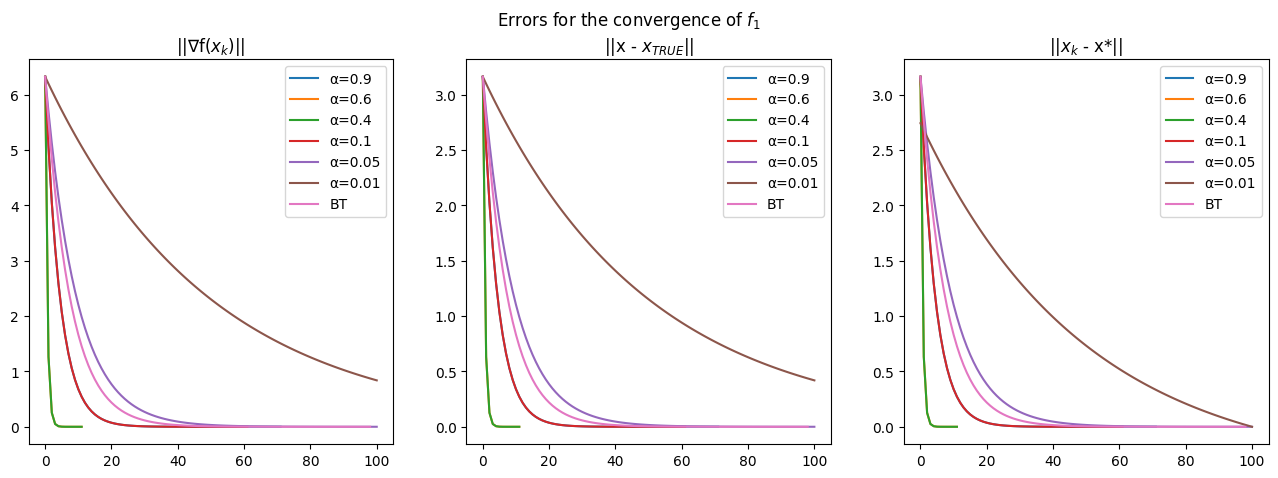

In [34]:
alpha = (.9, .6, .4, .1, .05, .01)
x_sol = np.array([3,1])
plt.figure(figsize=(16, 5))
plt.suptitle("Errors for the convergence of $f_1$")
for a in alpha:
    x, k, f_val, grads, err, err_true, err_star = GD(f1, grad_f1, alpha= a, x0 = np.zeros((2,)), kmax = 100, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
    plt.subplot(1,3,1)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err)
    
    plt.subplot(1,3,2)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
    
    plt.subplot(1,3,3)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
    
x, k, f_val, grads, err, err_true, err_star = GD_b(f1, grad_f1, x0 = np.zeros((2,)), kmax = 100, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
plt.subplot(1,3,1)
plt.title("||\N{NABLA}f($x_k$)||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.subplot(1,3,2)
plt.title("||x - $x_{TRUE}$||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.subplot(1,3,3)
plt.title("||$x_k$ - x*||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.show()


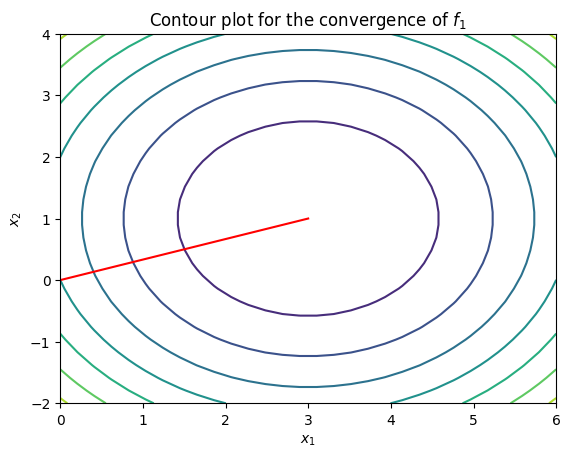

In [32]:
xv = np.linspace(0,6, 30)
yv = np.linspace(-2,4, 30)

xx, yy = np.meshgrid(xv, yv)
f1_ = lambda x, y:f1(np.array([x,y]))
zz = f1_(xx, yy)
plt.figure()
plt.title("Contour plot for the convergence of $f_1$")
plt.contour(xx, yy, zz)
plt.plot(x[:, 0], x[:, 1], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

#### f2 analysis

Computation Timeout: exceeded 201 iterations 	with solution $x_m=$ [2. 2.], α=0.1
||x[k]- x[k-1]|| <= tolx after 117 iterations	with solution $x_m=$ [1.         1.99999114], α=0.05
Computation Timeout: exceeded 201 iterations 	with solution $x_m=$ [1.         1.96552762], α=0.01
Computation Timeout: exceeded 201 iterations 	with solution $x_m=$ [1.         1.73472024], α=0.005
||x[k]- x[k-1]|| <= tolx after 100 iterations	with solution $x_m=$ [1.         1.99999352], α=BT


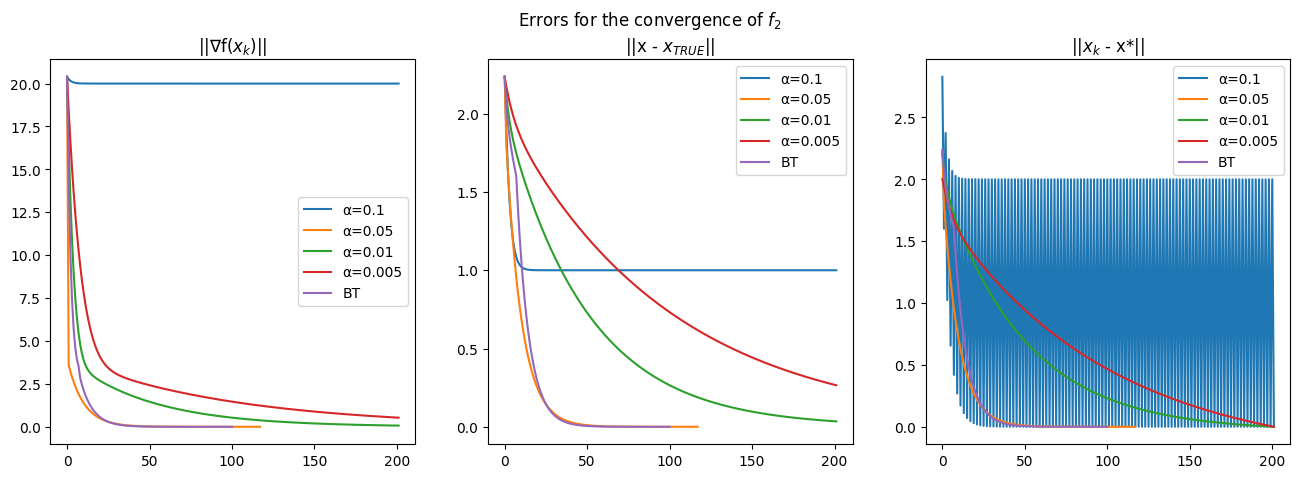

In [104]:
alpha = (.1, .05, .01, .005)
x_sol = np.array([1,2])

plt.figure(figsize=(16, 5))
plt.suptitle("Errors for the convergence of $f_2$")
for a in alpha:
    x, k, f_val, grads, err, err_true, err_star = GD(f2, grad_f2, alpha= a, x0 = np.zeros((2,)), kmax = 201, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
    plt.subplot(1,3,1)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err)
    
    plt.subplot(1,3,2)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
    
    plt.subplot(1,3,3)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
    
x, k, f_val, grads, err, err_true, err_star = GD_b(f2, grad_f2, x0 = np.zeros((2,)), kmax = 200, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
plt.subplot(1,3,1)
plt.title("||\N{NABLA}f($x_k$)||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.subplot(1,3,2)
plt.title("||x - $x_{TRUE}$||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.subplot(1,3,3)
plt.title("||$x_k$ - x*||")
plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.show()

(30, 30)


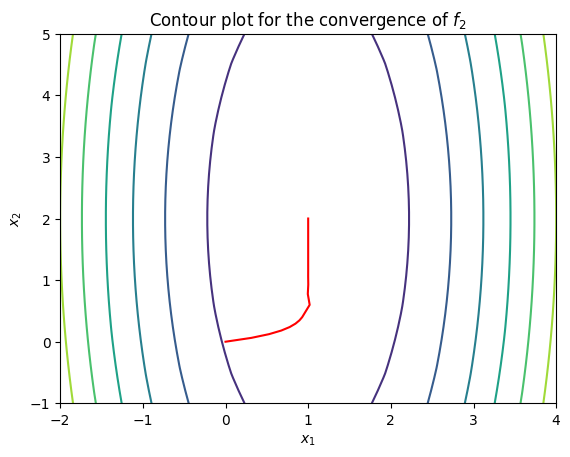

In [105]:
xv = np.linspace(-2,4, 30)
yv = np.linspace(-1,5, 30)

xx, yy = np.meshgrid(xv, yv)
print(xx.shape)
f2_ = lambda x, y:f2(np.array([x,y]))
zz = f2_(xx, yy)

plt.figure()
plt.title("Contour plot for the convergence of $f_2$")
plt.contour(xx, yy, zz)
plt.plot(x[:, 0], x[:, 1], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

#### f3 analysis

N = 5
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.95788013 0.98381431 1.01570745 1.0480225  0.9865784 ], α=0.05
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.93160907 0.96456964 1.00790556 1.06019218 1.0031925 ], α=0.02
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.87494211 0.91333192 0.96730598 1.04346111 1.08344022], α=0.01
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.78959091 0.83306356 0.89816237 1.00206438 1.18902531], α=0.005
Computation Timeout: exceeded 100 iterations	with solution $x_m=$ [0.98227293 0.99626076 1.00979358 1.01325828 0.99559018], α=BT
N = 10
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.97186423 0.98100963 0.99066031 1.00046653 1.00973008 1.0171023
 1.02000769 1.01364257 0.99035355 0.99678176], α=0.05
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.94179395 0.95501907 0.96975176 0.98596007 1.00337415 1.02119154
 1.03738

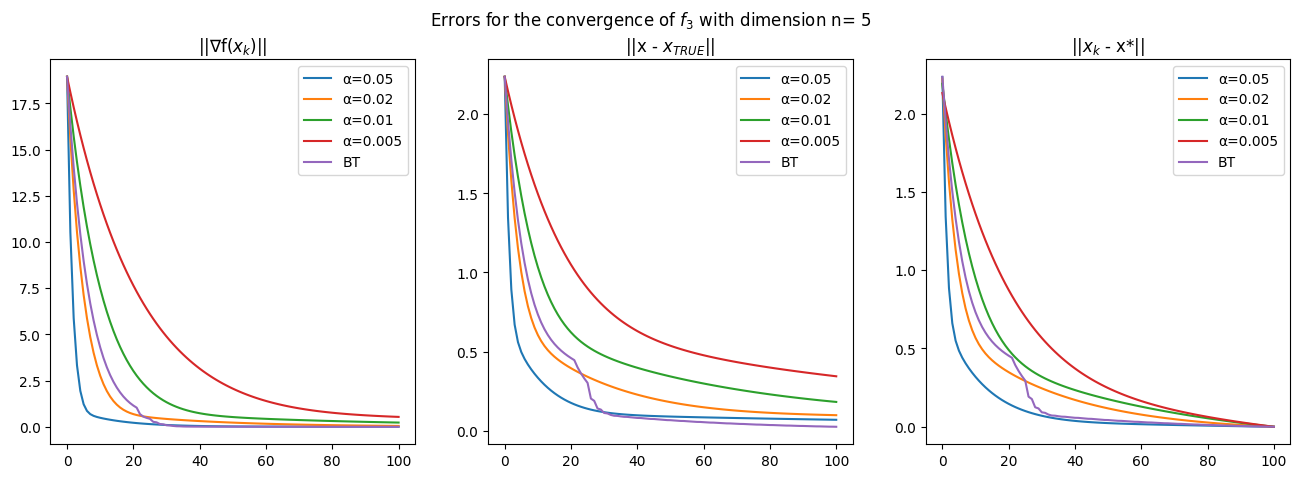

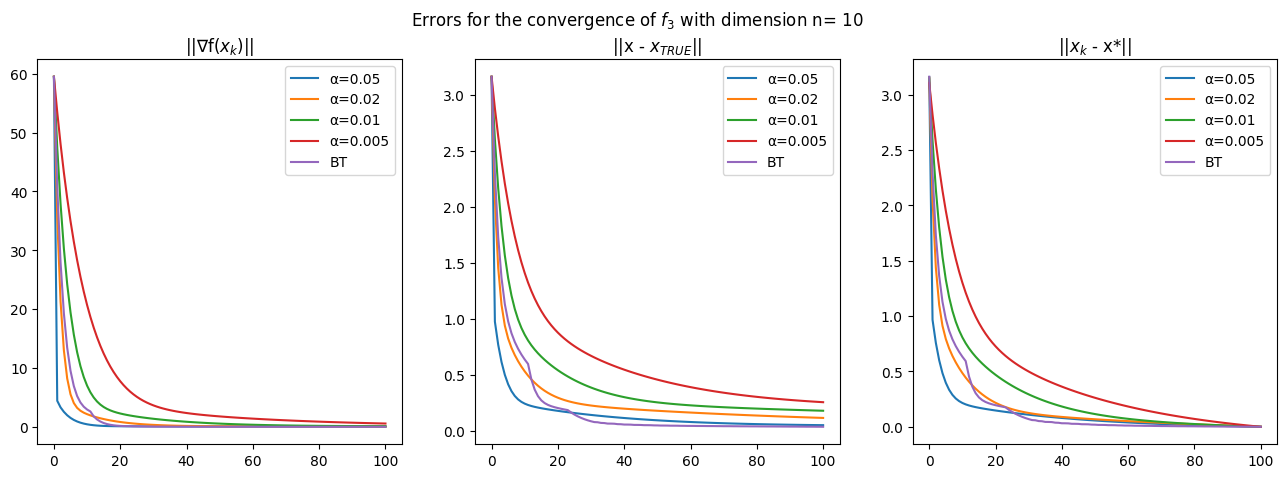

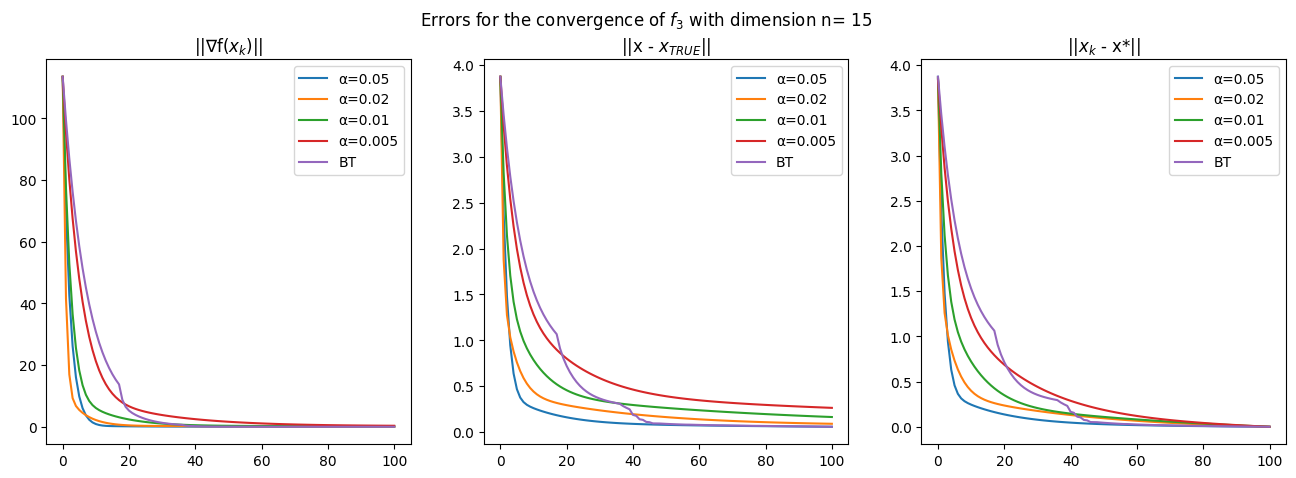

In [107]:
ns = (5, 10, 15)
for n in ns:
    print(f"N = {n}")
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((n,))
    b = A@x_true
    
    f3 = genf3(A, b)
    grad_f3 = gengrad_f3(A, b)
    
    alpha = (.05, .02, .01, .005)
    x_sol = x_true
    plt.figure(figsize=(16, 5))
    plt.suptitle(f"Errors for the convergence of $f_3$ with dimension n= {n}")
    for a in alpha:
        x, k, f_val, grads, err, err_true, err_star = GD(f3, grad_f3, alpha= a, x0 = np.zeros((n,)), kmax = 100, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
        plt.subplot(1,3,1)
        plt.plot(np.linspace(0, k, k+1, dtype= int), err)
        
        plt.subplot(1,3,2)
        plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
        
        plt.subplot(1,3,3)
        plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
        
    x, k, f_val, grads, err, err_true, err_star = GD_b(f3, grad_f3, x0 = np.zeros((n,)), kmax = 100, tolf = 1e-6, tolx= 1e-6, x_true= x_sol)
    plt.subplot(1,3,1)
    plt.title("||\N{NABLA}f($x_k$)||")
    plt.plot(np.linspace(0, k, k+1, dtype= int), err)
    plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

    plt.subplot(1,3,2)
    plt.title("||x - $x_{TRUE}$||")
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_true)
    plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

    plt.subplot(1,3,3)
    plt.title("||$x_k$ - x*||")
    plt.plot(np.linspace(0, k, k+1, dtype= int), err_star)
    plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])

plt.show()
    

#### f4 analysis

Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.91855187 0.97792219 1.01249951], α=0.05
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.87258257 0.94119805 1.06064658], α=0.02
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.80886588 0.88654935 1.11316893], α=0.01
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.70057363 0.77826318 1.06246498], α=0.005
||x[k]- x[k-1]|| <= tolx after 76 iterations	with solution $x_m=$ [0.92586408 0.97910435 1.00774434], α=BT
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.8617298  0.92464723 1.01157331], α=0.05
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.83231739 0.90107266 1.04242191], α=0.02
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.78081559 0.85686152 1.08455779], α=0.01
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [0.68330323 0.75928938 1.03828955], α=0.005
||x[k]- x[k

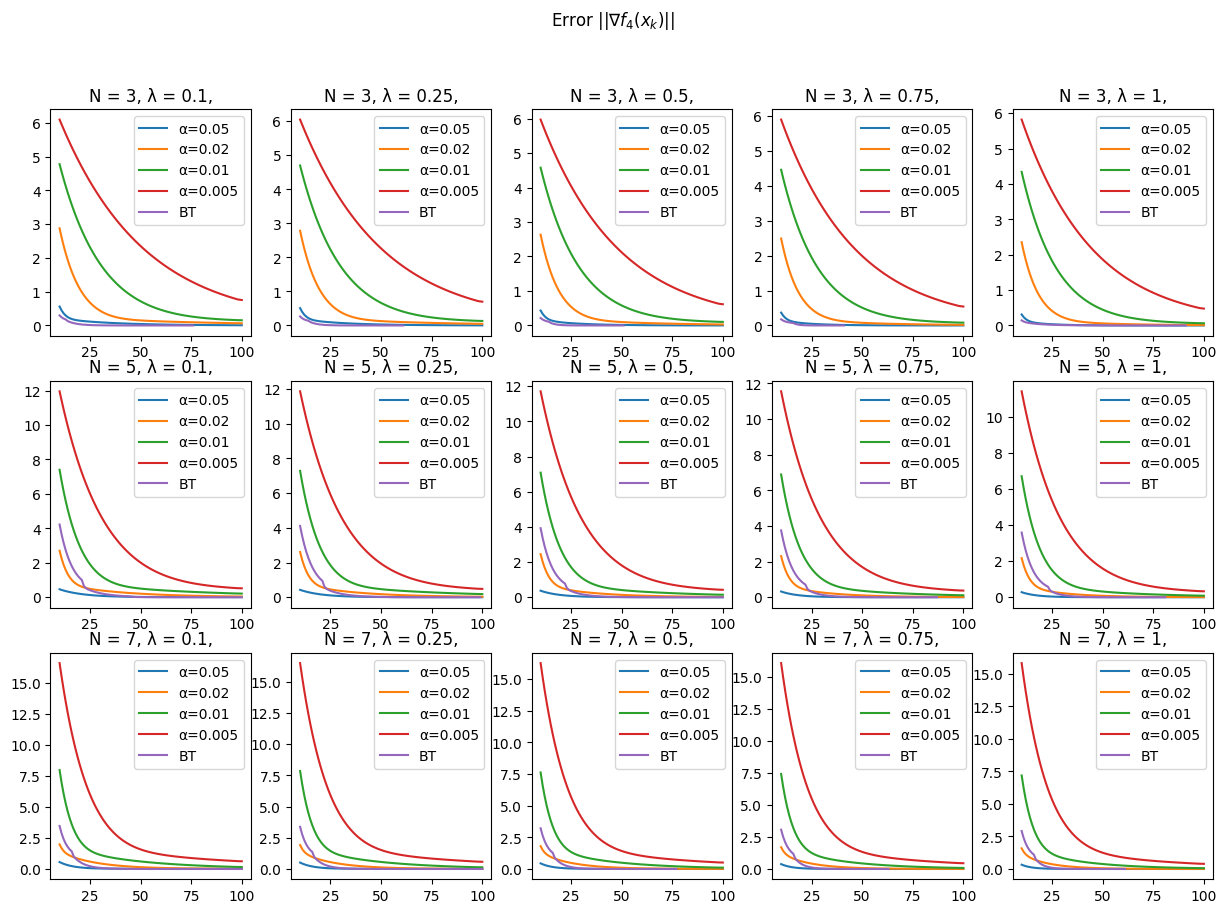

In [114]:
ls = (.1, .25, .5, .75, 1)
ns = (3, 5, 7)
plt.figure(figsize=(len(ns)*5, len(ls)*2))
plt.suptitle("Error ||\N{NABLA}$f_4(x_k)||$")
for idn, n in enumerate(ns):
    for idl, l in enumerate(ls):
            
        v = np.linspace(0,1,n)
        A = np.vander(v)
        x_true = np.ones((n,))
        b = A@x_true
        
        f4 = genf4(A, b, l)
        grad_f4 = gengrad_f4(A, b, l)
        
        alpha = (.05, .02, .01, .005)
        
        for a in alpha:
            x, k, f_val, grads, err, *_ = GD(f4, grad_f4, alpha= a, x0 = np.zeros((n,)), kmax = 100, tolf = 1e-6, tolx= 1e-6)
            plt.subplot(len(ns), len(ls), idn * len(ls) + idl + 1)
            plt.title(f"N = {n}, \u03BB = {l},")
            plt.plot(np.linspace(10, k, k-10, dtype= int), err[10:k])

            
        x, k, f_val, grads, err, *_ = GD_b(f4, grad_f4, x0 = np.zeros((n,)), kmax = 100, tolf = 1e-6, tolx= 1e-6)
        plt.subplot(len(ns), len(ls), idn * len(ls) + idl + 1)
        plt.plot(np.linspace(10, k, k-10, dtype= int), err[10:k])
        plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])


#### f5 analysis

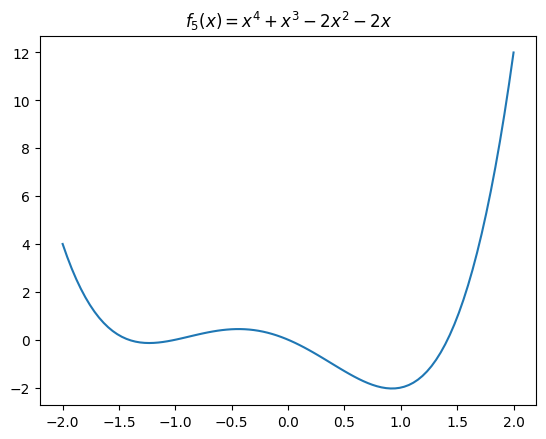

||x[k]- x[k-1]|| <= tolx after 18 iterations	with solution $x_m=$ [0.92222443], α=0.05
||x[k]- x[k-1]|| <= tolx after 72 iterations	with solution $x_m=$ [-1.23224546], α=0.02
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [-1.23252998], α=0.01
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [-1.24391592], α=0.005
Computation Timeout: exceeded 100 iterations	with solution $x_m=$ [-1.23224988], α=BT
||x[k]- x[k-1]|| <= tolx after 26 iterations	with solution $x_m=$ [-1.23224129], α=0.05
||x[k]- x[k-1]|| <= tolx after 73 iterations	with solution $x_m=$ [-1.23224553], α=0.02
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [-1.23248785], α=0.01
Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [-1.24181347], α=0.005
||x[k]- x[k-1]|| <= tolx after 95 iterations	with solution $x_m=$ [-1.23224773], α=BT
||x[k]- x[k-1]|| <= tolx after 30 iterations	with solution $x_m=$ [-1.2322379], α=0.05
||x[k]- x[k-1]|| <= tolx after 7

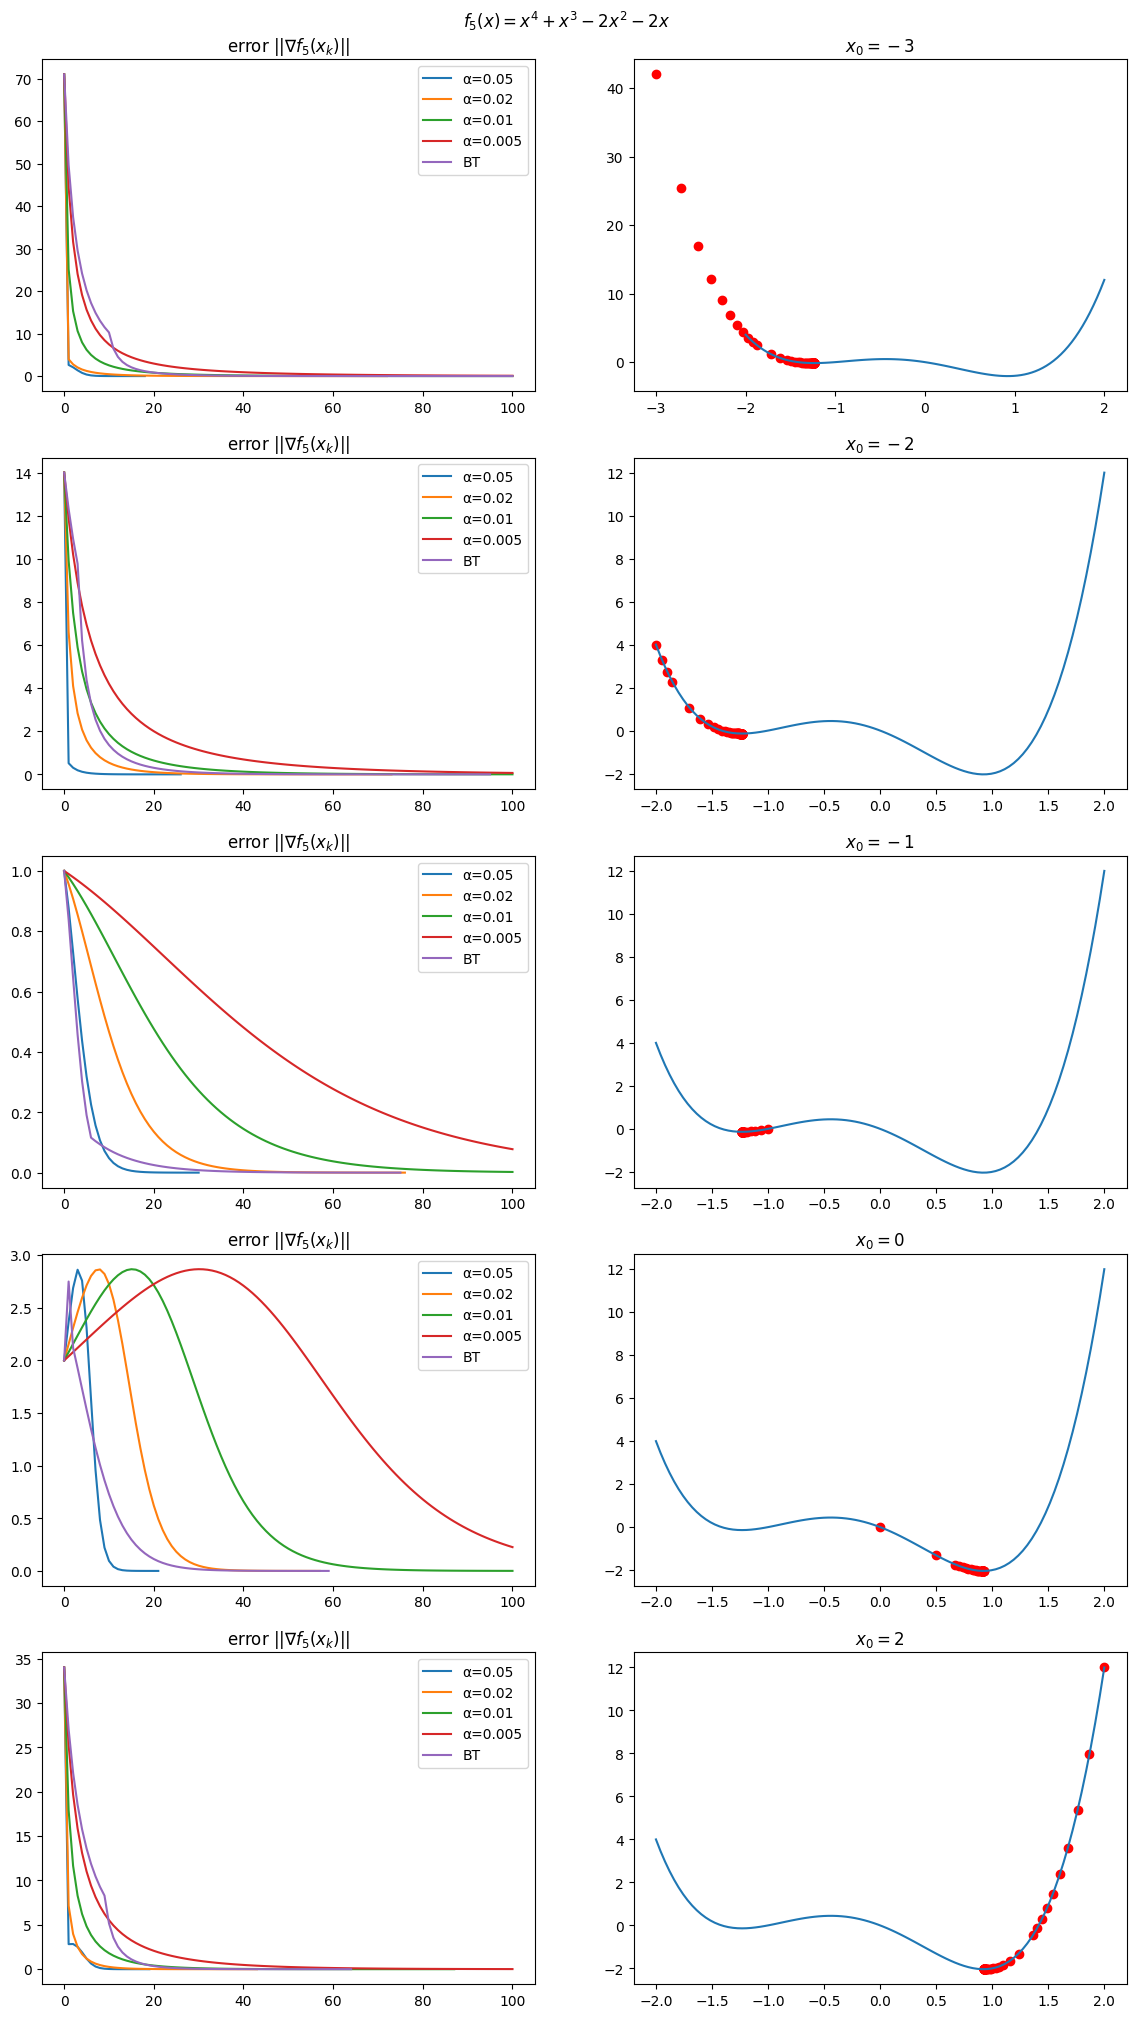

Minima found:
		x_0 = -3
α			x_m
0.05			0.9222244344832334
0.02			-1.2322454584789149
0.01			-1.2325299831138332
0.005			-1.2439159208230253
		x_0 = -2
α			x_m
0.05			-1.2322412878648914
0.02			-1.2322455285474203
0.01			-1.232487852780875
0.005			-1.241813468836063
		x_0 = -1
α			x_m
0.05			-1.2322379011790183
0.02			-1.2322338475190406
0.01			-1.2319093987150656
0.005			-1.22062344587952
		x_0 = 0
α			x_m
0.05			0.922224290645061
0.02			0.9222216827060782
0.01			0.9221880518912546
0.005			0.9025033613076684
		x_0 = 2
α			x_m
0.05			0.9222240896899795
0.02			0.9222278401869777
0.01			0.9222322138714723
0.005			0.9232119147381788


In [116]:
x = np.linspace(-2,2,100)
y = f5(x)
plt.figure()
plt.plot(x,y)
plt.title("$f_5(x) = x^{4} + x^{3} - 2x^{2} - 2x$")
plt.show()

x0s = tuple([np.array([xx]) for xx in (-3, - 2, -1, 0, 2)])
alpha = (.05, .02, .01, .005)

plt.figure(figsize=(2*7, len(x0s)*5))
xmins = np.empty((len(x0s), len(alpha) + 1))
plt.suptitle("$f_5(x) = x^{4} + x^{3} - 2x^{2} - 2x$", y= .9)

for idx, x0 in enumerate(x0s):
    for ida, a in enumerate(alpha):
        x, k, f_val, grads, err, *_ = GD(f5, grad_f5, alpha= a, x0= x0, kmax = 100, tolf = 1e-6, tolx= 1e-6)
        plt.subplot(len(x0s), 2, idx*2 + 1)
        plt.title(f"error $||\u2207f_5(x_k)||$") # 
        plt.plot(np.linspace(0, k, k+1, dtype= int), err)
        xmins[idx, ida] = x[k]
            
    x, k, f_val, grads, err, *_ = GD_b(f5, grad_f5, x0, kmax = 100, tolf = 1e-6, tolx= 1e-6)
    plt.subplot(len(x0s), 2, idx*2 + 1)
    plt.plot(np.linspace(0, k, k+1, dtype= int), err)
    plt.legend([f"\u03B1={a}" for a in alpha] + ["BT"])
    xmins[idx, len(alpha)] = x[k]
    
    plt.subplot(len(x0s), 2, idx*2 + 2)
    xvec = np.linspace(-2,2,100)
    yvec = f5(xvec)
    plt.plot(xvec, yvec)
    plt.title(f"$x_0 = {x0[0]}$")
    plt.scatter(x, f_val, c= "red")
    
plt.show()

print("Minima found:")
for i, x0 in enumerate(x0s):
    print(f"\t\tx_0 = {x0[0]}\n\u03B1\t\t\tx_m")
    for j, a in enumerate(alpha):
        print(f"{a}\t\t\t{xmins[i, j]}")

# Stochastic Gradient Descent

#### Prepare MNIST Data

In [117]:
data = pd.read_csv("data.csv")
data = np.array(data)

X = data[:, 1:].T
Y = data[:, 0]

digit_1 = 2
digit_2 = 6

digits = (digit_1, digit_2)

def specify_sample(X, Y, digit):
    idx = Y == digit
    return X[:, idx], Y[idx]

newsplitdata = [specify_sample(X, Y, dig) for dig in digits]

newX = np.concatenate([newsplitdata[i][0] for i in range(len(digits))], axis=1)
newY = np.concatenate([newsplitdata[i][1] for i in range(len(digits))])

N_train = Y.shape[0]//2

def split_data(X, Y, Ntrain = N_train):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    X_train = X[:, idx[:Ntrain]]
    X_test = X[:, idx[Ntrain:]]
    Y_train = Y[idx[:Ntrain]]
    Y_test = Y[idx[Ntrain:]]
    return (X_train, Y_train), (X_test, Y_test)

(Xtrain, Ytrain), (Xtest, Ytest) = split_data(newX, newY, newY.shape[0]//6*5) 

X_backup = X
Y_backup = Y

X = Xtrain
Y = Ytrain


for i, y in enumerate(Y):
    if y == digit_1:
        Y[i] = 0
    elif y == digit_2:
        Y[i] = 1
    else:
        1/0


#### Prepare Utility Functions


In [77]:
def sigmoid(z):
    return 1/(1 + np.exp(-z) ) 

d, N = X.shape
print(X.shape, Xtest.shape)

def f(w, xhat):
    return sigmoid(xhat.T @ w)

def ell(w, Xhat, Y):
    d, N = Xhat.shape
    sum = 0
    for i in range(N):
        sum += abs(f(w, Xhat[:, i]) - Y[i])**2
    return sum / N
    
def grad_ell(w, Xhat, Y):
    d, N = Xhat.shape
    sum = 0
    for i in range(N):
        ff = f(w, Xhat[:, i])
        sum += ff * (1 - ff) * Xhat[:, i] * (ff - Y[i])
    return sum / N

def predict(w, X, threshold=0.5, hat = True):
    d, N = X.shape
    Xhat = X
    if not hat:
        Xhat = np.concatenate((np.ones((1,N)), Xhat), axis=0)
        
    Y = np.zeros((N,), dtype= int)
    for i in range(N):
        if f(w, Xhat[:, i]) >= threshold:
            Y[i] = digit_2
        else:
            Y[i] = digit_1
    return Y

def accuracy(Y_1, Y_2):
    array = Y_1 == Y_2
    return len(array[array == True])/len(array)

(784, 6925) (784, 1389)


#### SGD implementation

0.9820014398848093


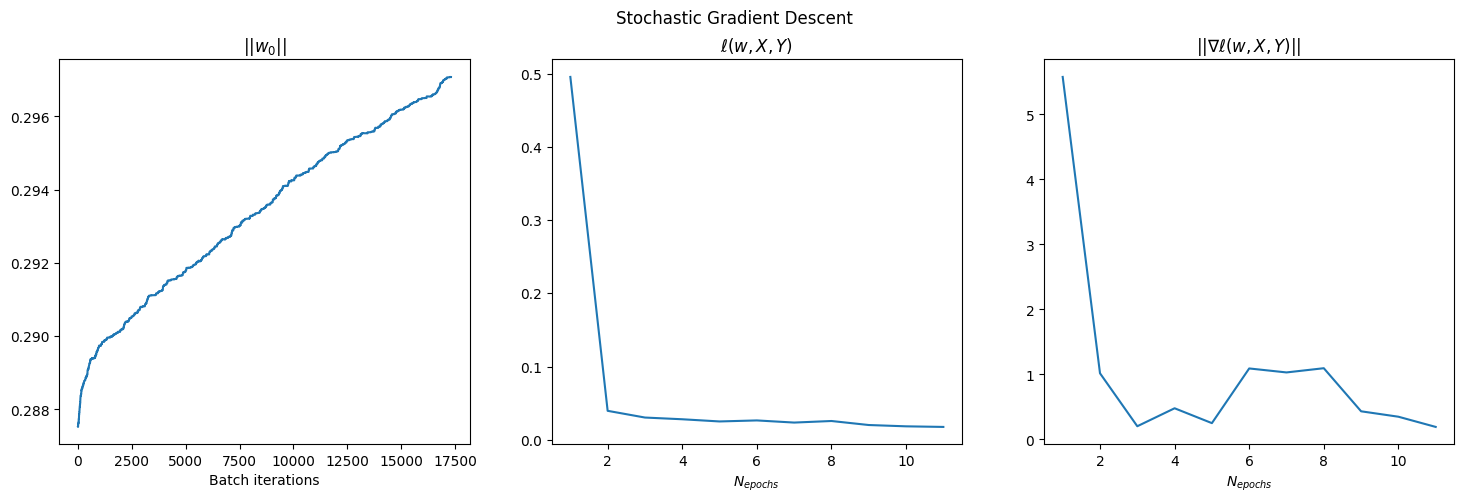

In [97]:
data = (X, Y)
S = 4
E = 10

def SGD(l, grad_l, w0, data, batch_size = 5, n_epochs = 10):
    alpha = 5e-5
    
    X, Y = data
    d, N = X.shape
    
    X = np.concatenate((np.ones((1,N)), X), axis=0)
    
    n_batch_per_epoch = N // batch_size
    
    w = np.zeros((n_batch_per_epoch * n_epochs + 1, d + 1))
    f_val = np.zeros((n_epochs + 1,))
    grads = np.zeros((n_epochs + 1, d + 1))
    err = np.zeros((n_epochs + 1,))
    
    w[0, :] = w0
    f_val[0] = l(w0, X, Y)
    grads[0, :] = grad_l(w0, X, Y)
    err[0] = np.linalg.norm(grads[0], 2)
    
    indexes = np.arange(N)
    
    for epoch in range(n_epochs):
        np.random.shuffle(indexes)
        
        for k in range(1, n_batch_per_epoch + 1):
            if k * batch_size > N:
                idx = indexes[(k - 1)*batch_size : ]
            else:
                idx = indexes[(k - 1)*batch_size : (k) * batch_size]
            X_k = X[:, idx]
            Y_k = Y[idx]
            w_ = w0 - alpha * grad_l(w0, X_k, Y_k)
            w[epoch * n_batch_per_epoch + k, :] = w_
            w0 = w_
        
        f_val[epoch + 1] = l(w0, X, Y)
        grads[epoch + 1, :] = grad_l(w0, X, Y)
        err[epoch + 1] = np.linalg.norm(grads[epoch + 1, :], 2)
    
    w_star = w[-1, np.newaxis].repeat(n_batch_per_epoch * n_epochs + 1, axis=0)
    err_star = np.linalg.norm(w-w_star, axis=1)
    
    return w, f_val, grads, err, err_star


w0 = np.random.normal(0, 1e-2, (d + 1,))

w, f_val, grads, err_SGD, err_star_SGD = SGD(ell, grad_ell, w0 , data, S, E )


wstar = w[-1]
Y_fit = predict(wstar, Xtest, hat = False)

acc = accuracy(Y_fit, Ytest)

print(acc)

normw0 = np.linalg.norm(w, 2, axis= 1)
plt.figure(figsize=(18, 5))
plt.suptitle("Stochastic Gradient Descent")
plt.subplot(1, 3, 1)
plt.title("$||w_0||$")
plt.xlabel("Batch iterations")
plt.plot(np.arange(1, N // S * E + 2), normw0)
plt.subplot(1, 3, 2)
plt.xlabel("$N_{epochs}$")
plt.title("$\u2113(w, X, Y)$")
plt.plot(np.arange(1, E + 2), f_val)
plt.subplot(1, 3, 3)
plt.xlabel("$N_{epochs}$")
plt.title("$||\N{NABLA}\u2113(w, X, Y)$||")
plt.plot(np.arange(1, E + 2), err_SGD)
plt.show()

In [87]:
kmax = 100
ell_gd = lambda w: ell(w, np.concatenate((np.ones((1,N)), X), axis=0), Y)
grad_ell_gd = lambda w: grad_ell(w, np.concatenate((np.ones((1,N)), X), axis=0), Y)
_, _, _, _, err_GD, _, err_star_GD = GD(ell_gd, grad_ell_gd, x0 = np.random.normal(0, 1e-2, (d + 1,)), kmax= kmax, tolx= 1e-6, tolf= 1e-6, a= 5e-4)

Computation Timeout: exceeded 100 iterations 	with solution $x_m=$ [-6.83877221e-03  1.91556875e-02  1.56474619e-02  1.13398019e-02
  4.83330949e-03 -1.48954010e-02  1.11628465e-02  1.21442171e-02
 -5.69690674e-04  1.48328280e-03 -3.18908143e-03  1.19665742e-03
 -3.50203583e-04  6.82500985e-03  1.29539942e-02 -1.87909083e-02
  1.10991512e-02 -4.62943306e-04 -2.51355348e-03 -9.02591982e-03
  2.23849419e-03  5.31434339e-03  3.34625539e-03  3.98830182e-03
  1.68197545e-03  2.36458720e-03 -8.80420363e-03  1.34405740e-02
 -1.14172104e-02  7.80591189e-03 -1.09703729e-02  2.77371463e-03
 -8.79129157e-03 -2.32034157e-03  5.05444126e-03  2.04221674e-02
  1.23476519e-02  1.64257481e-03 -1.15372216e-02  2.18225733e-03
 -8.57638698e-03  5.78478731e-04 -1.79645938e-02  2.44949063e-03
 -1.51795173e-02  7.94669627e-03  1.58834793e-02  1.68748902e-02
  4.32283145e-03 -7.68786557e-03  1.06398621e-02  4.93410958e-03
 -1.20867901e-02 -7.27572349e-03 -4.88611008e-03 -1.66375312e-02
  1.89646652e-03 -4.497

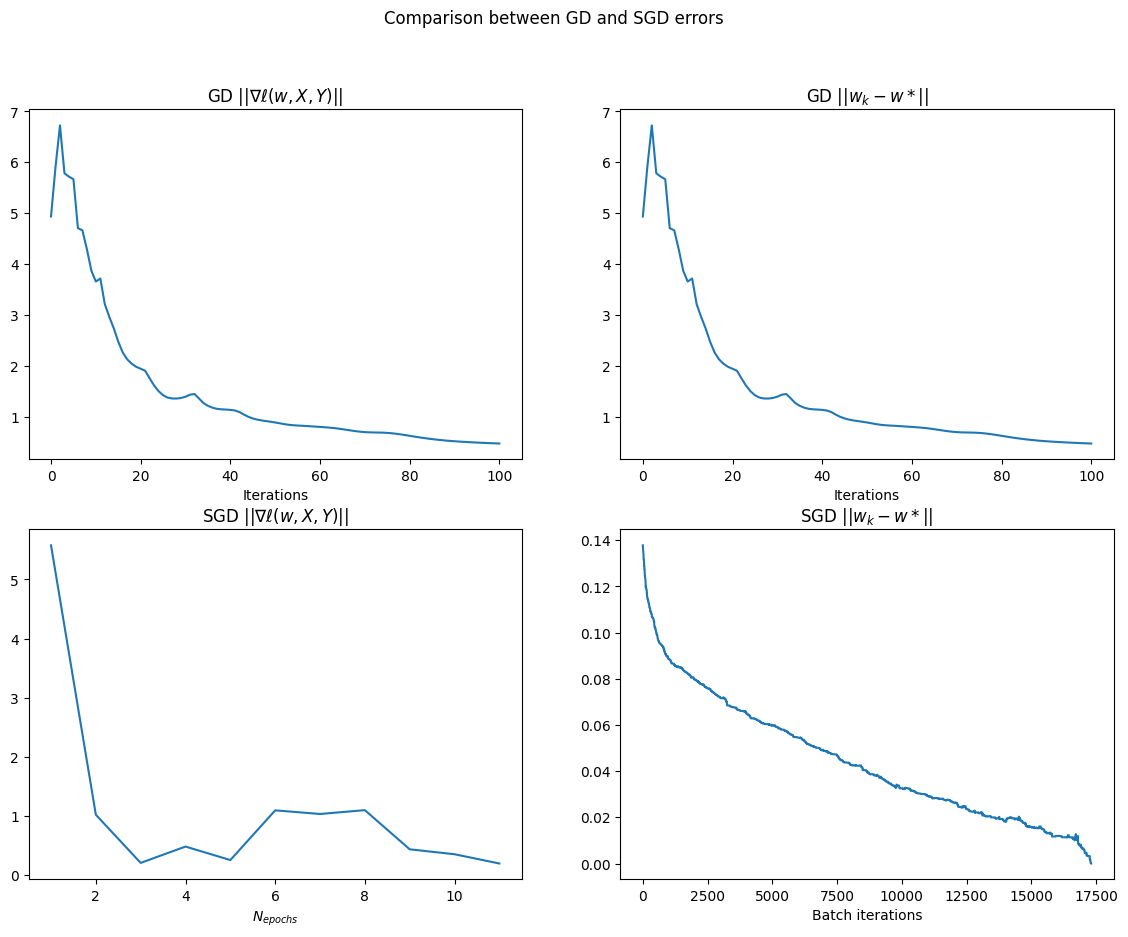

In [98]:
plt.figure(figsize= (14, 10))
plt.suptitle("Comparison between GD and SGD errors")

plt.subplot(2, 2, 1)
plt.title("GD $||\N{NABLA}\u2113(w, X, Y)||$")
plt.plot(np.arange(kmax + 1), err_GD)
plt.xlabel("Iterations")

plt.subplot(2, 2, 2)
plt.title("GD ||$w_k - w*$||")
plt.plot(np.arange(kmax + 1), err_GD)
plt.xlabel("Iterations")

plt.subplot(2, 2, 3)
plt.title("SGD $||\N{NABLA}\u2113(w, X, Y)||$")
plt.plot(np.arange(1, E + 2), err_SGD)
plt.xlabel("$N_{epochs}$")

plt.subplot(2, 2, 4)
plt.title("SGD ||$w_k - w*$||")
plt.plot(np.arange(1, N // S * E + 2), err_star_SGD)
plt.xlabel("Batch iterations")

plt.show()